<a href="https://colab.research.google.com/github/aadityaahire7/NeuroVision-Proactive-Stroke-Monitoring/blob/main/neuroVison_stroke_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:

# Load the dataset
file_path = '/content/Brain_Stroke_Dataset.csv'


df = pd.read_csv(file_path)

In [ ]:

# Impute missing BMI values
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Split Cholesterol Levels into HDL and LDL
df[['HDL', 'LDL']] = df['Cholesterol Levels'].str.extract(r'HDL:\s*(\d+),\s*LDL:\s*(\d+)').astype(float)

# Drop the original 'Cholesterol Levels' column
df.drop(columns=['Cholesterol Levels'], inplace=True)

# Check for missing values in 'stroke' column and drop them
df.dropna(subset=['stroke'], inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Alcohol Intake', 'Family History of Stroke']:
    df[col] = le.fit_transform(df[col])

# Split data into features and target
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

# Apply SMOTE before splitting
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)


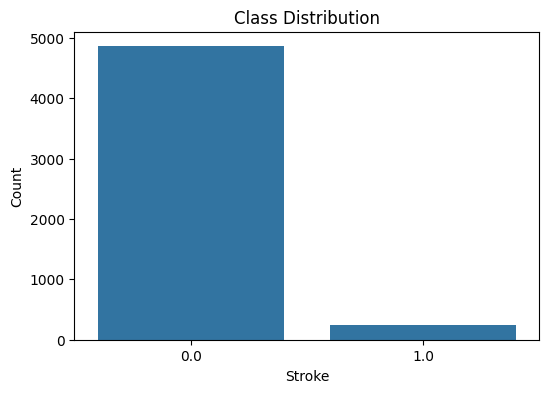

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


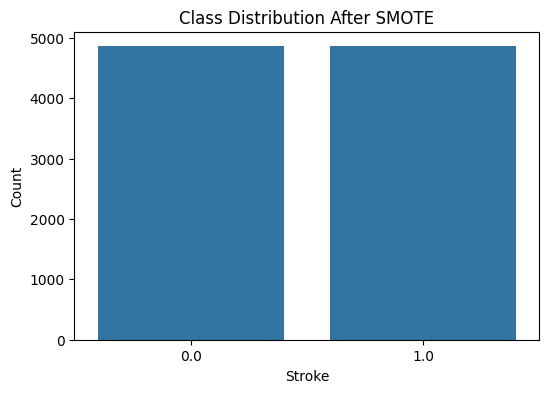

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_sm)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


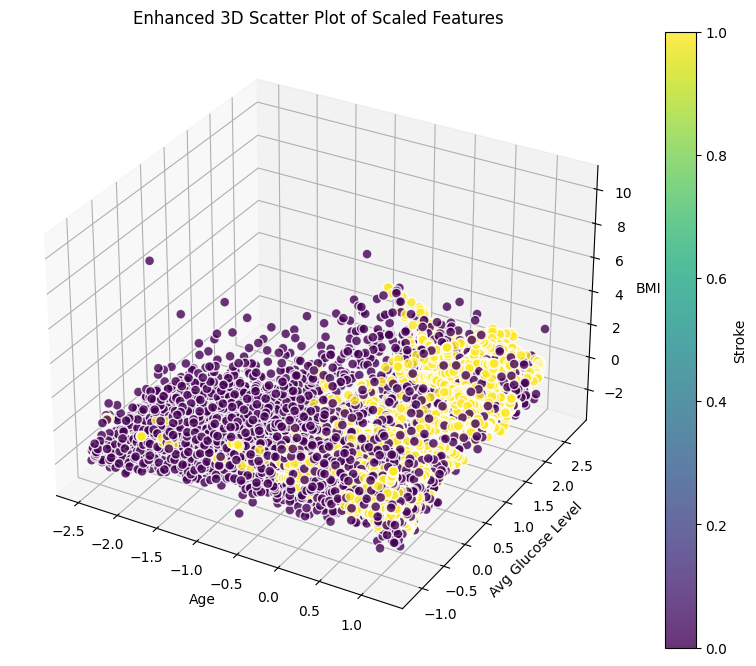

In [ ]:
# Assuming 'scaled_df' needs to be redefined

# Convert scaled data back to a DataFrame for plotting
scaled_df = pd.DataFrame(X_scaled, columns=df.drop(['id', 'stroke'], axis=1).columns)
scaled_df['stroke'] = y_sm  # Add the target variable back to the DataFrame

# Better quality 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the same three features as before with enhanced visual settings
sc = ax.scatter(scaled_df['age'], scaled_df['avg_glucose_level'], scaled_df['bmi'],
                c=scaled_df['stroke'], cmap='viridis', s=50, alpha=0.8, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Avg Glucose Level')
ax.set_zlabel('BMI')
ax.set_title('Enhanced 3D Scatter Plot of Scaled Features')

# Adding a color bar for better interpretation
plt.colorbar(sc, ax=ax, label='Stroke')
plt.show()


<ipython-input-7-6d781290f996>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke['BMI_Binned'] = pd.cut(df_stroke['bmi'], bins=np.arange(15, 50, 5))
<ipython-input-7-6d781290f996>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke['Glucose_Binned'] = pd.cut(df_stroke['avg_glucose_level'], bins=np.arange(50, 260, 20))


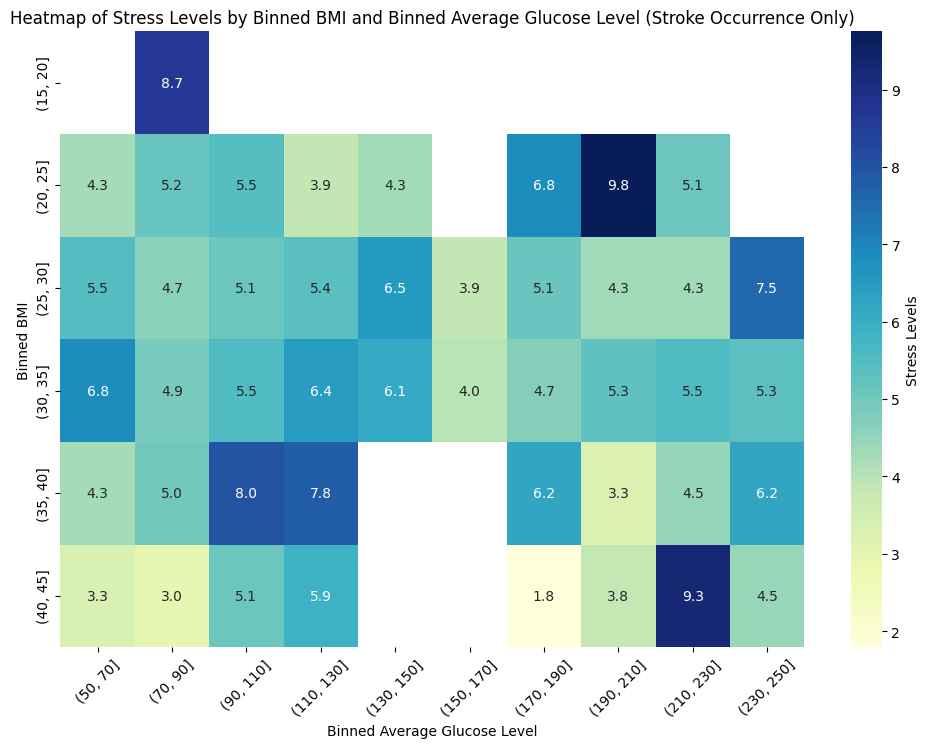

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the data to include only rows where stroke occurred
df_stroke = df[df['stroke'] == 1]

# Bin the BMI and Glucose Level into categories for a cleaner heatmap
df_stroke['BMI_Binned'] = pd.cut(df_stroke['bmi'], bins=np.arange(15, 50, 5))
df_stroke['Glucose_Binned'] = pd.cut(df_stroke['avg_glucose_level'], bins=np.arange(50, 260, 20))

# Create a pivot table for the heatmap (Binned BMI, Binned Glucose Level, Stress Levels)
pivot_table = df_stroke.pivot_table(values='Stress Levels', index='BMI_Binned', columns='Glucose_Binned', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Stress Levels'})

# Add labels and title
plt.title('Heatmap of Stress Levels by Binned BMI and Binned Average Glucose Level (Stroke Occurrence Only)')
plt.xlabel('Binned Average Glucose Level')
plt.ylabel('Binned BMI')

plt.xticks(rotation=45)
plt.show()


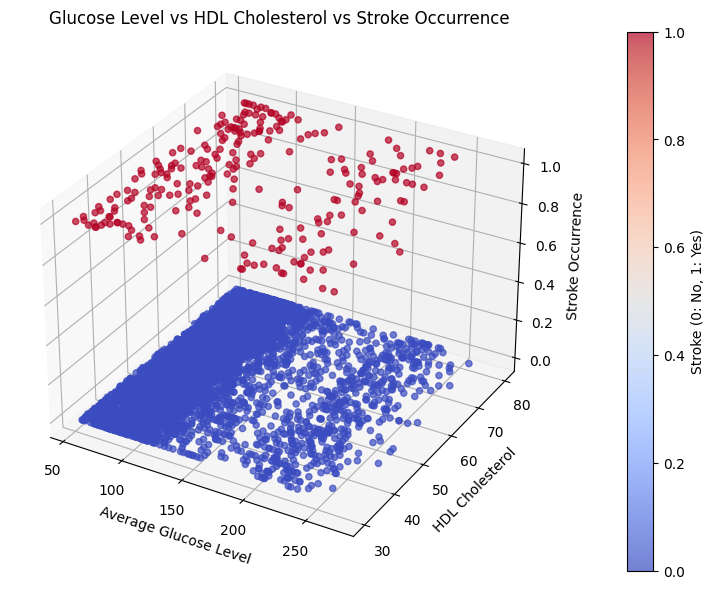

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming Cholesterol Levels have been split into HDL and LDL columns
# Let's plot average glucose level, HDL, and stroke occurrence

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define variables for the plot
glucose = df['avg_glucose_level']
hdl = df['HDL']  # Using HDL as a part of Cholesterol Levels
stroke = df['stroke']

# Plotting the data
scatter = ax.scatter(glucose, hdl, stroke, c=stroke, cmap='coolwarm', alpha=0.7)

# Add labels and title
ax.set_xlabel('Average Glucose Level')
ax.set_ylabel('HDL Cholesterol')
ax.set_zlabel('Stroke Occurrence')
ax.set_title('Glucose Level vs HDL Cholesterol vs Stroke Occurrence')

# Add color bar to represent stroke occurrence
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Stroke (0: No, 1: Yes)')

plt.show()


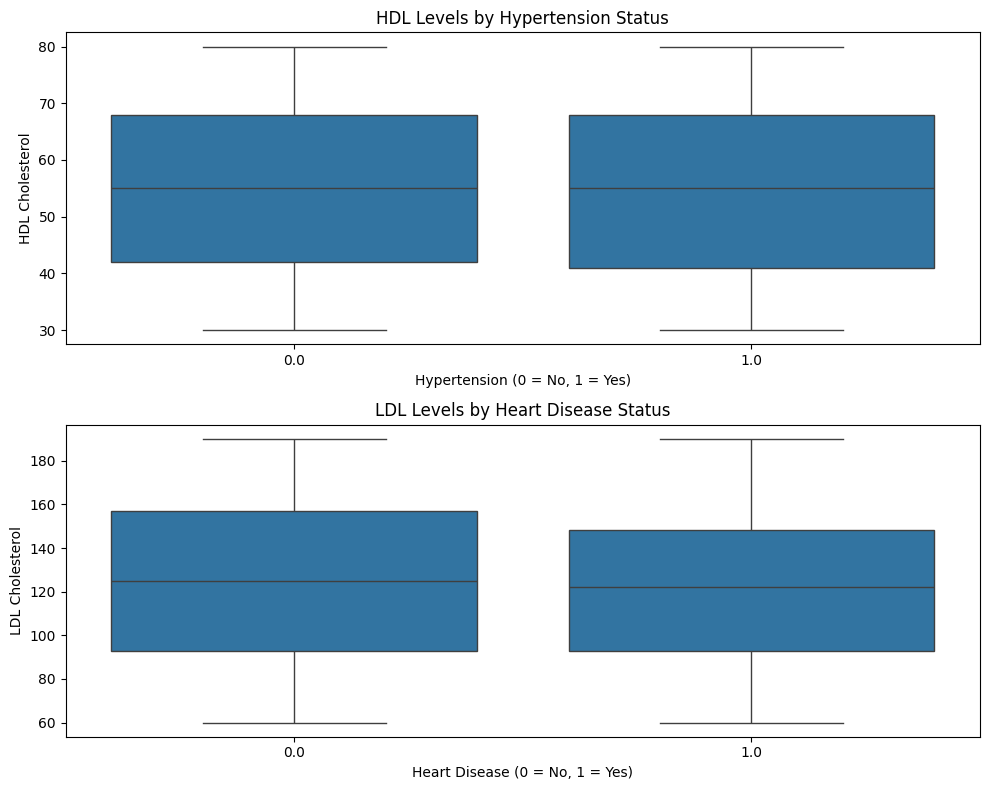

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure for the box plots
plt.figure(figsize=(10, 8))

# Create a box plot for HDL and hypertension
plt.subplot(2, 1, 1)
sns.boxplot(x='hypertension', y='HDL', data=df)
plt.title('HDL Levels by Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('HDL Cholesterol')

# Create a box plot for LDL and heart disease
plt.subplot(2, 1, 2)
sns.boxplot(x='heart_disease', y='LDL', data=df)
plt.title('LDL Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('LDL Cholesterol')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


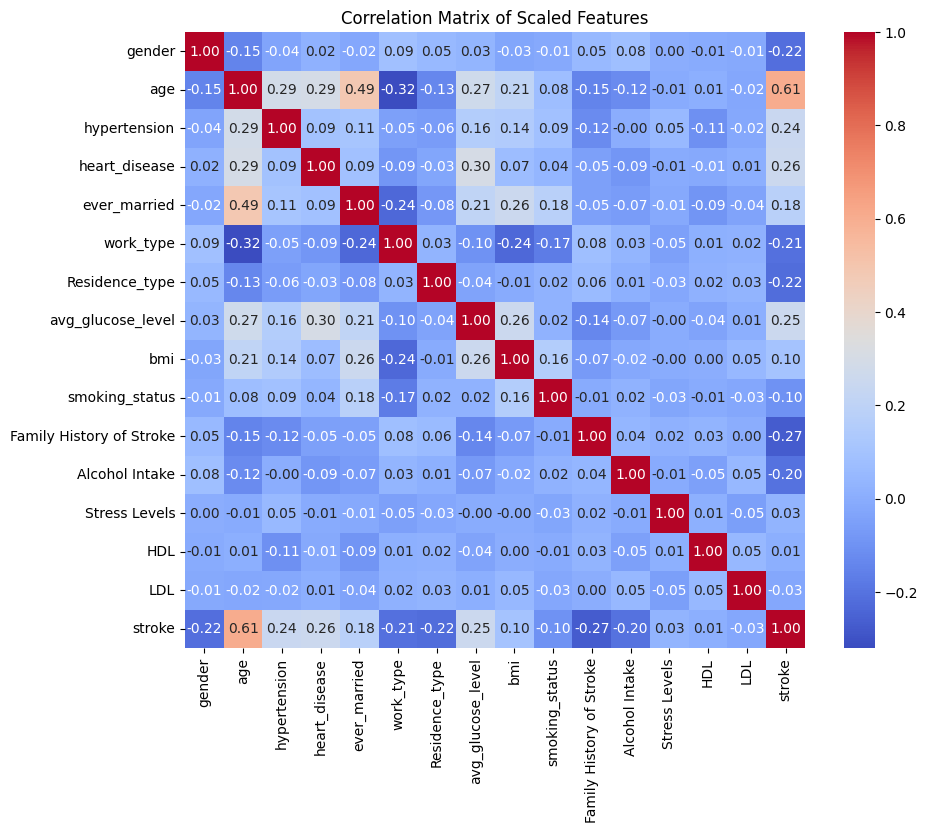

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Features')
plt.show()


In [ ]:

# No need to reshape for DNN
X_train_dnn, X_test_dnn, y_train, y_test = train_test_split(X_scaled, y_sm, test_size=0.2, random_state=42)
X_train_xgb, X_test_xgb, _, _ = train_test_split(X_scaled, y_sm, test_size=0.2, random_state=42)

# Define DNN model
def create_dnn_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train_dnn.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn_model = create_dnn_model()
dnn_model.fit(X_train_dnn, y_train, epochs=25, batch_size=64, verbose=1)

# Define XGBoost model
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train_xgb, y_train)

# DNN predictions
dnn_pred_train = dnn_model.predict(X_train_dnn).flatten()
dnn_pred_test = dnn_model.predict(X_test_dnn).flatten()

# XGBoost predictions
xgb_pred_train = xgb_model.predict_proba(X_train_xgb)[:, 1]
xgb_pred_test = xgb_model.predict_proba(X_test_xgb)[:, 1]

# Stacking
stacked_train = np.column_stack((dnn_pred_train, xgb_pred_train))
stacked_test = np.column_stack((dnn_pred_test, xgb_pred_test))

# Meta-model
meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacked_train, y_train)
stacked_pred = meta_model.predict(stacked_test)

# Evaluation
accuracy = accuracy_score(y_test, stacked_pred)
print(f"Stacked Model Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7552 - loss: 0.5107
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8537 - loss: 0.3440
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8661 - loss: 0.3157
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8865 - loss: 0.2837
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8935 - loss: 0.2738
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9006 - loss: 0.2432
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8961 - loss: 0.2549
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9012 - loss: 0.2406
Epoch 9/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9019 - loss: 0.2431
Epoch 10/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9107 - loss: 0.2222
Epoch 11/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9154 - loss: 0.2158
Epoch 12/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

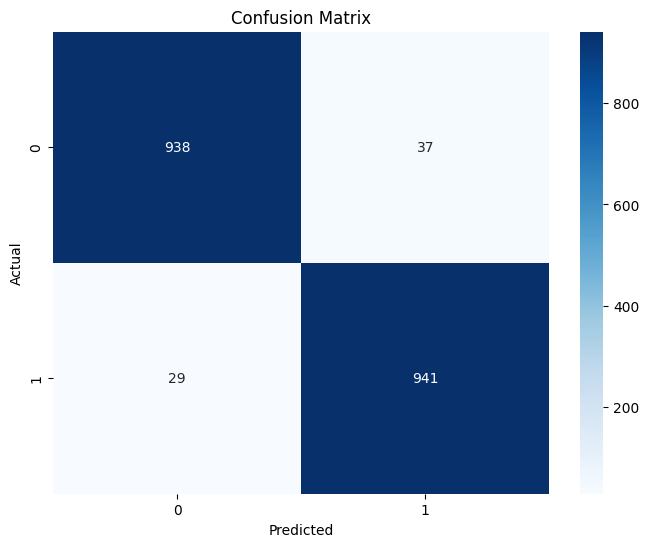

In [ ]:
# Re-import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume we have the following variables from previous execution:
# y_test, stacked_pred

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, stacked_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


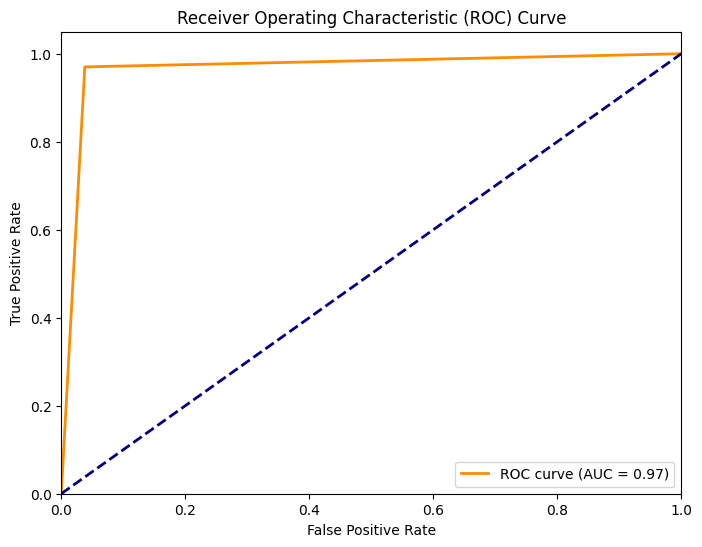

In [ ]:
# Re-run necessary imports
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume we have the following variables from previous executions:
# y_test, stacked_pred

# Generate ROC curve data for the stacked model
fpr, tpr, _ = roc_curve(y_test, stacked_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve with the AUC score
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, stacked_pred, target_names=['No Stroke', 'Stroke'])

print(report)


              precision    recall  f1-score   support

   No Stroke       0.97      0.96      0.97       975
      Stroke       0.96      0.97      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

